<a href="https://colab.research.google.com/github/AshwathL/Machine-learning/blob/main/lung_cancer_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

df = pd.read_csv("survey lung cancer.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
#features colomn
f_col = []

In [3]:
# splitting of features and target as x and y
x = df.iloc[:,2:15]
y = df.iloc[:,15]


In [4]:
#splitting of training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=0)
x_train

,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
106,2,2,2,2,2,2,1,1,1,1,2,2,1
29,1,2,1,1,1,2,1,2,2,2,2,1,1
153,2,1,1,2,1,1,1,1,1,1,1,1,2
20,2,2,2,2,2,2,1,1,1,1,2,2,1
46,2,2,1,1,2,1,2,1,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2,2,2,2,2,2,2,2,1,2,2,2,2
192,2,2,2,2,2,1,1,1,1,1,1,1,1
117,2,2,2,2,1,2,2,1,1,1,2,2,1
47,2,2,1,2,1,2,1,2,2,2,1,2,2


In [13]:
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

In [6]:
# importing the decision tree
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [33]:
y_pred = classifier.predict(x_test)

In [15]:
cm = confusion_matrix(y_test,y_pred)

In [19]:
#importing packages for plotting the tree
from sklearn.tree import export_graphviz
import graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [ ]:
'''#code for plotting
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('lungcancer.png')
Image(graph.create_png())'''

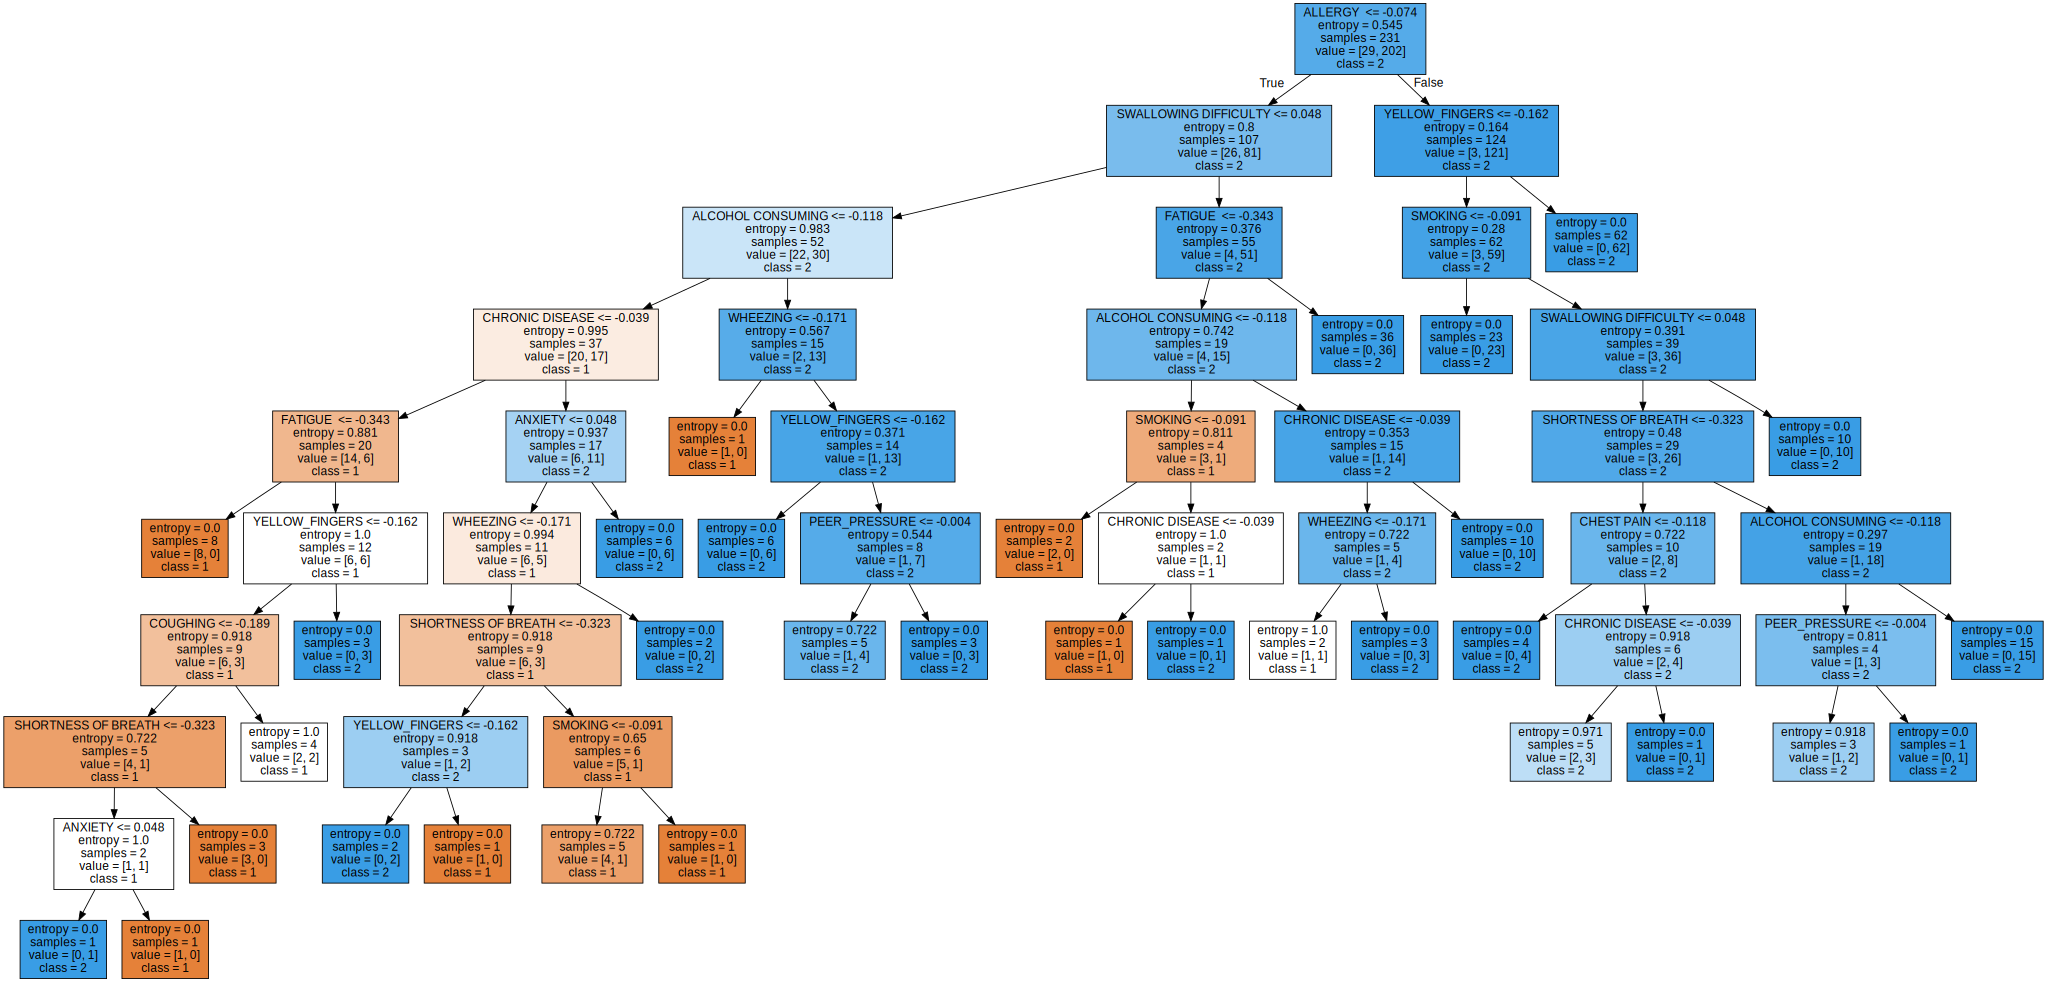

In [32]:
graphviz.Source(export_graphviz(classifier,feature_names=x.columns,filled=True,class_names=['1','2','3','4','5','6','7','8','9','10','11','12','13'],out_file=None))